# Data preparation

In [9]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from collections import Counter

### Split image paths into train, test and validation sets and save them into json files

In [10]:
def read_image_paths(path_image_folder):
    image_paths = []
    for root, dirs, files in os.walk(path_image_folder):
        for file in files:
            if file.endswith(".jpg"):
                image_paths.append(os.path.join(root, file))
    return image_paths

In [11]:
original_train_paths = read_image_paths("dataset/versions/1/train")
original_val_paths = read_image_paths("dataset/versions/1/valid")
original_test_paths = read_image_paths("dataset/versions/1/test")
save_path = "paths/"

# shuffle non annotated images in train set
np.random.seed(0)
train_paths_not_labelled = np.random.permutation(original_train_paths)

# stratified split of validation set into a new train (annotated) and validation set
original_val_labels = [0 if "nowildfire" in path else 1 for path in original_val_paths]
train_paths_labelled, val_paths = train_test_split(original_val_paths, test_size=0.5, stratify=original_val_labels, random_state=0)

# save all paths to json files
json.dump(list(train_paths_not_labelled), open(save_path+"train_paths_unlabelled.json", "w"), indent=4)
json.dump(list(train_paths_labelled), open(save_path+"train_paths_labelled.json", "w"), indent=4)
json.dump(list(val_paths), open(save_path+"val_paths.json", "w"), indent=4)
json.dump(list(original_test_paths), open(save_path+"test_paths.json", "w"), indent=4)

### Analyze the dataset

In [12]:
print("Number of images in unlabelled train set: ", len(train_paths_not_labelled))
print("Number of images in labelled train set: ", len(train_paths_labelled))
print("Number of images in validation set: ", len(val_paths))
print("Number of images in test set: ", len(original_test_paths))

Number of images in unlabelled train set:  30250
Number of images in labelled train set:  3150
Number of images in validation set:  3150
Number of images in test set:  6300


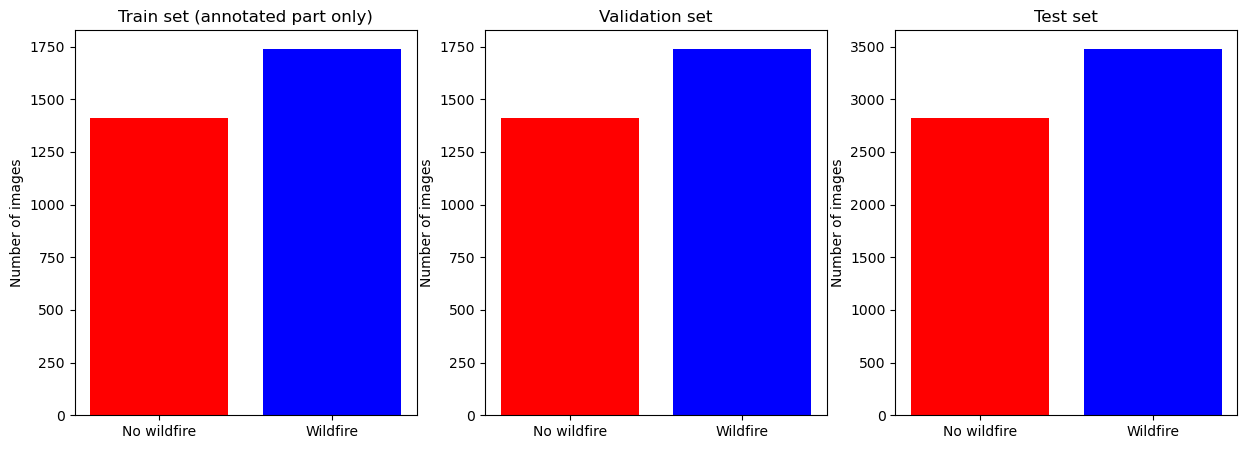

In [13]:
train_labels = [0 if "nowildfire" in path else 1 for path in train_paths_labelled]
val_labels = [0 if "nowildfire" in path else 1 for path in val_paths]
test_labels = [0 if "nowildfire" in path else 1 for path in original_test_paths]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(Counter(train_labels).keys(), Counter(train_labels).values(), color=["blue", "red"])
axs[0].set_title("Train set (annotated part only)")
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["No wildfire", "Wildfire"])
axs[0].set_ylabel("Number of images")

axs[1].bar(Counter(val_labels).keys(), Counter(val_labels).values(), color=["blue", "red"])
axs[1].set_title("Validation set")
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["No wildfire", "Wildfire"])
axs[1].set_ylabel("Number of images")

axs[2].bar(Counter(test_labels).keys(), Counter(test_labels).values(), color=["blue", "red"])
axs[2].set_title("Test set")
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(["No wildfire", "Wildfire"])
axs[2].set_ylabel("Number of images")

plt.show()